# 04. 정칙화

모델 학습 시 발생하는 과대적합 문제를 방지하기 이해 사용되는 기술

모델이 암기가 아니라 일반화 할 수 있도록 손실함수에 규제를 가하는 방식

모델이 특정 피처나 특정 패턴에 너무 비중을 할당하지 않도록하여 일반화 성능을 향상시킨다

정칙화를 적용하면 학습 데이터들이 갖고 있는 작은 차이점에 대해 덜 민감해져 모델 분산 값이 낮아진다

정칙화는 모델이 비교적 복잡하고 학습에 사용되는 데이터의 수가 적을 때 활용한다

모델이 단순하다면 모델의 매개변수 수가 적어져 정칙화가 필요하지않다

또한 데이터의 수가 많거나 잘 정제되어 노이즈가 거의 없는 경우 사용하지 않는다

### L1 정칙화       

라쏘 정칙화 라고도 하며 L1 Norm 방식을 사용해 규제하는 방법

벡터 또는 행렬 값의 절댓값 합계를 계산

L1 정칙화는 손실 함수에 가중치 절댓값의 합을 추가해 과대적합을 방지

손실함수에 가중치 절댓값의 합으로 규제를 가하므로 모델은 가중치 절댓값의 합도 최소가 되는 방향으로 학습이 진행됨

모델 학습 시 값이 크지 않은 가중치들은 0에 수렴하게 되어 예측에 필요한 특징의 수가 줄어듬

불필요한 가중치가 0이 되므로 L1 정칙화를 적용한 모델은 특징 선택 효과를 얻을 수 있다

입력 데이터에 더 민감해지며 항상 최적의 규제를 가하지 않으므로 사용에 주의한다

주로 선형 모델에 적용하며 선형 회귀 모델에 L1 정칙화를 적용하는 것을 라쏘 회귀 라고 한다

In [ ]:
for x, y in train_dataloader:
    x = x.to(device)
    y = y.to(device)

    output = model(x)

    _lambda = 0.5
    l1_loss = sum(p.abs().sum() for p in model.parameters())

    loss = criterion(output, y) + _lambda * l1_loss

### L2 정칙화

릿지 정칙화라고도 하며 L2 norm 방식을 사용해 규제하는 방법  

L2 Norm은 벡터 또는 행렬 값의 크기를 계산한다

손실 함수에 가중치 제곱의 합을 추가해 과대적합을 방지하도록 규제한다

L1과 동일한 방식으로 모델에 규제를 가하지만 하나의 특징이 너무 중요한 요소가 되지 안도록 규제를 가하는 것에 의미를 둔다

L1 정칙화에 비해 가중치 값들이 비교적 균일하게 분포되며 가중치를 0으로 만들지 않고 0에 가깝게 만든다

오차를 최소화하면서 가중치를 작게 유지하고 골고루 분포되게끔 하므로 모델 복잡도가 일부 조정된다

과대적하을 효과적으로 방지하기 위해서는 조기 중지 또는 드롭아웃과 같은 기술과 함께 적용한다

주로 심층 신경망 모델에서 사용하며 선형 회구 모델에서 적용하는 경우 릿지 회귀라고 한다

In [ ]:
for x, y in train_dataloader:
    x = x.to(device)
    y = y.to(device)

    output = model(x)

    _lambda = 0.5
    l2_loss = sum(p.pow(2.0).sum() for p in model.parameters())

    loss = criterion(output, y) + _lambda * l2_loss

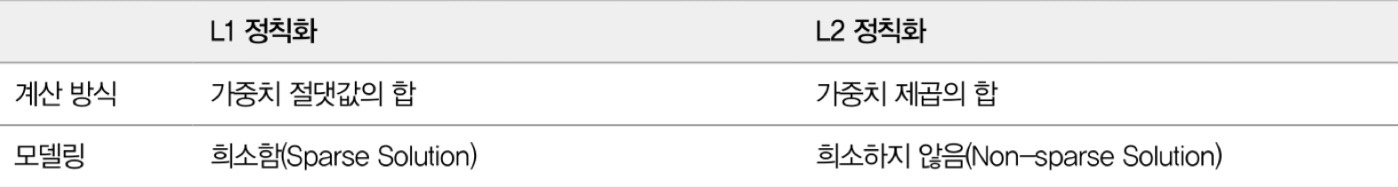

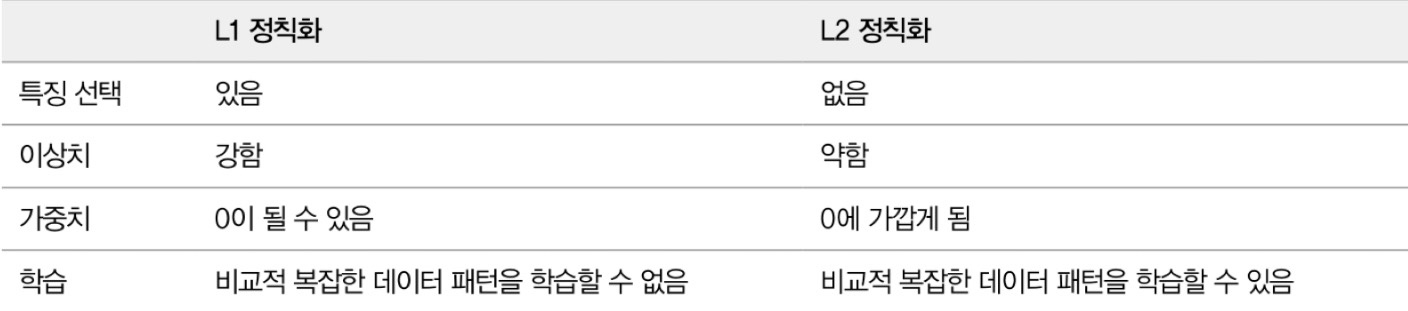

### 가중치 감쇠 


모델이 더 작은 가중치를 갖도록 손실 함수에 규제를 가하는 방법

일반적으로 가중치 감쇠가 L2 정칙화와 동의어로 사용되지만, 가중치 감쇠는 손실 함수에 규제 항을 추가하는 기술 자체를 의미

한마디로 L2  정규화와 동일하며 weigt_decay 하이퍼파라미터를 설정해 구현 가능하고 조기 중지 또는 드롭아웃 같은 기술과 함게 사용

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)

### 모멘텀

경사 하강법 알고리즘의 변형 중 하나로 이전에 이동했던 방향과 기울기의 크기를 고려하여 가중치를 갱신

이를 위해 지수 가중 이동평균을 사용하며, 이전 기울기 값의 일부를 현재 기울기 값에 추가해 가중치를 갱신

이전 기울기 값에 의하여 설정된 방향으로 더 빠르게 이동하므로 일종의 관성 효과를 얻을 수 있음

모멘텀 계수는 0.0 ~1.0 사이의 값으로 설정할 수 있으며 일반적으로 0.9와 같은 값을 사용한다

가중치 감쇠처럼 momentom 하이퍼 파라미터를 설정해 구현 가능

### 엘라스틱 넷 

L1 정칙화와 L2 정칙화를 결합해 사용하는 방식

L1 정칙화는 모델이 희박한 가중치를 갖게 규제한다면 L2 정칙화는 큰 정칙화를 갖지 않게 규제하기 때문에

이 두가지 방식을 결합하여 희소성과 작은 가중치의 균형을 맞춘다

두 방식의 선형 조합으로 혼합 비율을 설정하여 가중치를 규제한다

두 방식의 장점을 효율적으로 활용할 수 있지만 혼합 비율도 조정해야 하므로 더 많은 튜닝이 필요하고 계산 복잡도로 인해 더 많은 리소스를 소모한다

### 드롭아웃    

모델의 훈련 과정에서 일부 노드를 일정 비율로 제거하거나 0으로 설정해 과대적합을 방지하는 간단하고 효율적인 방법이다

과대적합이 발생하는 이유 중 하나는 동조화 현상 때문이다

동조화 현상이란 모델 학습 중 특정 노드의 가중치나 편향이 큰 값을 가지게 되면 다른 노드가 큰 값을 갖는 노드에 의존하는 것을 말한다

그러므로 학습 과정에서 일부 노드를 제거해 노드 간 의존성을 억제해야 한다

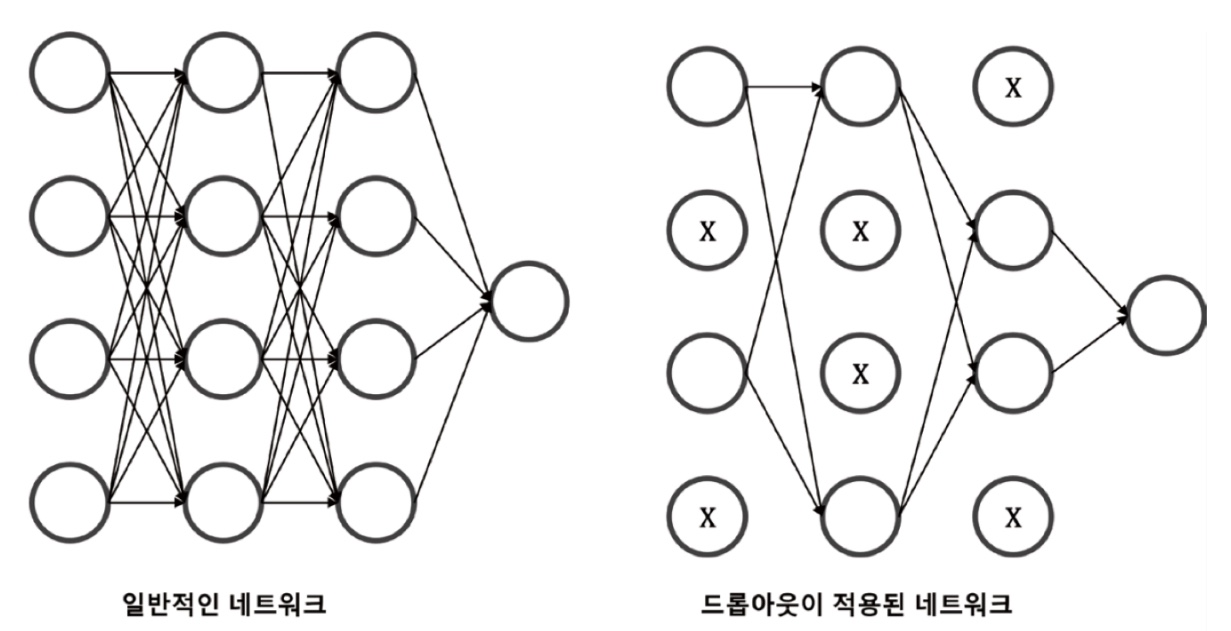

드롭아웃은 이와같이 일부 노드를 제거해 학습하므로 동조화 현상을 방지할 수 있어서 모델 평균화가 가능해진다

드롭아웃은 충분한 데이터셋과 비교적 깊은 모델에 적용해야한다

In [1]:
from torch import nn

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(10, 10)
        self.dropout = nn.Dropout(p=0.5)
        self.layer2 = nn.Linear(10, 10)

    def forward(self, x):
        x = self.layer1(x)
        x = self.dropout(x)
        x = self.layer2(x)
        return x

p는 베르누이 분포의 모수를 의미하며 이 분포로 각 노드이 제거 여부를 확률적으로 선택한다

이 과정은 순방향 메서드에서 드롭아웃을 적용할 계층 노드에 적용된다

 일반적으로 배치 정규화와 동시에 사용하지 않으므로 주의한다

 드롭아웃은 극단적인 비율로 모델에 적용하지 않는다면 일반적으로는 성능 향상의 이점을 얻을 수 있다
 
 많은 특징을 사용해 학습하는 이미지 인식이나 음성 인식 모델에서 성능이 향상되는 결과를 볼 수 있다

### 그레이디언트 클리핑

모델을 학습할 때 기울기가 너무 커지는 현상을 방지하는 데 사용되는 기술이다

과대적합 모델은 특정 노드 가중치가 너무 크다는 특징으로 높은 분산 값을 갖게 하여 모델의 성능이 저하될 수 있는데 이를 방지하기 위해 가중치 최댓값을 규제해 최대 임곗값을 초과하지 않도록 기울기를 잘라 설정한 임곗값으로 변경한다

그레이디언트 클리핑은 가중치 노름이 최대 입곗값보다 높은 경우에 수행된다 

최대 임곗값을 넘는 경우 기울기 벡터의 방향을 유지하면서 기울기를 잘라 규제할 수 있다

일반적으로 L2 노름을 사용해 최대 기울기를 규제한다

순환신경망(RNN)이나 LSTM 모델을 학습하는 데 사용된다

두 모델은 기울기 폭주에 취약한데 그레이디언트 클래핑이 억제하므로 많이 활용된다

가중치 값에 대한 엄격한 제약 조건을 요구하는 상황이거나 모델이 큰 기울기에 민감할 때 유용하게 활용할 수 있다


for x, y in train_dataloader:
    x = x.to(device)
    y = y.to(device)

    output = model(x)
    loss = criterion(output, y)
    
    optimizer.zero_grad()
    loss.backward()

    torch.nn.utils.clip_grad_norm_(model.parameters(), 0.1)

    optimizer.step()

그레이디언트 클리핑 함수는 역전파를 수행한 이우화 최적화 함수를 반영하기전에 호출한다

그레이디언트 클리핑은 최댓값을 규제해 비교적 큰 학습률을 사용할 수 있게 해주지만 최대 임곗값이 높으면 모델의 표현력이 떨어지며, 낮은 경우 오히려 학습이 필요해질 수 있다